In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_mldata

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

# Zad

Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji

Sprawdź

**
n_components = 2,...,20
**

oraz metod:

* MultinomialNB
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier

In [3]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
print(X.shape, " ", y.shape)


(70000, 784)   (70000,)


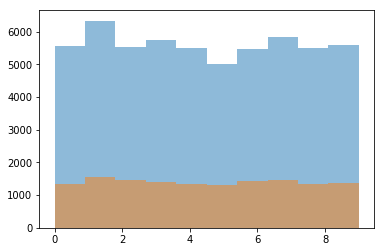

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [5]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ("pca", PCA(n_components=1)), 
    ('classifier', LinearSVC(C=1))
])

param_grid = {
            'pca__n_components': np.arange(1, 10),
            'classifier__C': [0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.001, 'pca__n_components': 8}

In [ ]:
pipe_2 = Pipeline([
    ("pca", PCA(n_components=1)), 
    ('classifier', SVC(C=1, probability=True))
])

param_grid_2 = {
            'pca__n_components': np.arange(1, 10),
            'classifier__C': [0.01, 0.1, 1, 10, 100,],
            'classifier__gamma': [0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

In [ ]:
pipe_3 = Pipeline([
    ("pca", PCA(n_components=1)), 
    ('classifier', LogisticRegression(C=1))
])

param_grid_3 = {
            'pca__n_components': np.arange(1, 10),
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

In [ ]:
pipe_4 = Pipeline([
    ("pca", PCA(n_components=1)),
    ('classifier', KNeighborsClassifier(n_neighbors=2, metric='euclidean'))
])

param_grid_4 = {
            'pca__n_components': np.arange(1, 10),
            'classifier__n_neighbors': [2, 5, 10, 11,12],
            'classifier__metric': ['euclidean', 'cityblock', 'cosine']
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

In [ ]:
pipe_5 = Pipeline([
    ("pca", PCA(n_components=1)),
    ('classifier', DecisionTreeClassifier())
])

param_grid_5 = {
            'pca__n_components': np.arange(1, 10),
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.(X_train, y_train)
grid_5.best_params_

In [ ]:
pipe_6 = Pipeline([
   ("pca", PCA(n_components=1)), 
   ('classifier', BaggingClassifier(
                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                    max_samples=100, bootstrap=True, random_state=42))
  ])

param_grid_6 = {
            'pca__n_components': np.arange(1, 10),
            'classifier__n_estimators': [10,50,100],
            'classifier__max_samples': [10,20]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_


In [ ]:
pipe_7 = Pipeline([("pca", PCA(n_components=1)), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {
            'pca__n_components': np.arange(1, 10),
            'classifier__n_estimators': [10, 50, 100],
            'classifier__max_leaf_nodes': [10, 20],
            'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

In [ ]:
pipe_8 = Pipeline([("pca", PCA(n_components=1)),  
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_8 = {
                'pca__n_components': np.arange(1, 10),
                'classifier__n_estimators': [10, 50, 100],
                'classifier__max_leaf_nodes': [10, 20],
                'classifier__max_depth': [10, 20]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

In [ ]:
pipe_9 = Pipeline([("pca", PCA(n_components=1)), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_9 = {
                'pca__n_components': np.arange(1, 10),
                'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

In [ ]:
pipe_10 = Pipeline([("pca", PCA(n_components=1)), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_10 = {
                'pca__n_components': np.arange(1, 10),
                'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
grid_10.best_params_

In [ ]:
pipe_11 = Pipeline([("pca", PCA(n_components=1)), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_11 = {
                'pca__n_components': np.arange(1, 10),
                'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_11 = GridSearchCV(pipe_11, param_grid_11, cv=kfold, return_train_score=True)

grid_11.fit(X_train, y_train)
grid_11.best_params_

In [ ]:


voting_clf = VotingClassifier(
    estimators=[('grid_2', grid_2.best_estimator_), 
                ('grid_3', grid_3.best_estimator_), 
                ('grid_4', grid_4.best_estimator_), 
                ('grid_5', grid_5.best_estimator_), 
                ('grid_6', grid_6.best_estimator_), 
                ('grid_7', grid_7.best_estimator_), 
                ('grid_8', grid_8.best_estimator_), 
                ('grid_9', grid_9.best_estimator_),
                ('grid_10', grid_10.best_estimator_), 
                ('grid_11', grid_11.best_estimator_)
               ],
    voting='soft')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

estimator = xgboost.XGBClassifier(n_jobs=-1)

pipe_12 = Pipeline([("pca", PCA(n_components=1)), 
                   ('classifier', xgboost.XGBClassifier(n_jobs=-1))
                  ])

param_grid_12 = {
    'pca__n_components': np.arange(1, 10),
    'classifier__max_depth': [3, 5, 8, 10],
    'classifier__learning_rate': [0.001, 0.01, 0.05, 0.1],
    'classifier__n_estimators': [50, 100, 150, 200, 400],
    'classifier__gamma': [0, 0.5, 1, 2],
    'classifier__colsample_bytree': [1, 0.8, 0.5],
    'classifier__subsample': [1, 0.8, 0.5],
    'classifier__min_child_weight': [1, 5, 10]
}

grid_12 = RandomizedSearchCV(n_iter=30,estimator=pipe_12, 
                             param_distributions=param_grid_12, 
                      cv=kfold, 
                      return_train_score=True)

grid_12.fit(X_train, y_train)
grid_12.best_params_

In [8]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))
# models.append(('SVM rbf', grid_2.best_estimator_))
# models.append(('LR', grid_3.best_estimator_))
# models.append(('KNN', grid_4.best_estimator_))
# models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
# models.append(('BaggingClassifier', grid_6.best_estimator_))
# models.append(('RandomForestClassifier', grid_7.best_estimator_))
# models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
# models.append(('AdaBoostClassifier', grid_9.best_estimator_))
# models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
# models.append(('XGBClassifier', grid_11.best_estimator_))
# models.append(('voting_clf', voting_clf))
# models.append(('XGBClassifier r2', grid_12.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


SVM linear
precision_score: 0.6721378282593576
recall_score: 0.6527857142857143
f1_score: 0.6390835904827877
accuracy_score: 0.6527857142857143


In [10]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
# df.insert(loc=0, column='Method', value=['SVM linear','SVM rbf','LR','KNN','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','voting','XGBClassifier r'])
df.insert(loc=0, column='Method', value=['SVM linear'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM linear,0.672138,0.652786,0.639084,0.652786
